In [1]:
%matplotlib inline
import pandas as pd

# Reading the data

In [2]:
data = pd.read_csv('train.tsv', delimiter='\t')

Let's take a look at the data

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


# Exploratory Data Analysis

In [4]:
data.shape

(156060, 4)

In [5]:
data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


From above, we can draw the following conclusions: <br>
 - The maximum value on the Phrase ID is the same as the number of rows in the data hence, Phrase ID is a sequence number on the data.
 - Looking at the minimum and maximum value on the Sentiment, there are probably 5 sentiments 0, 1, 2, 3 and 4.
     - We shall check this by looking at the unique values.
    
Lastly, we're not sure right now as to what value the Sentence ID is adding to the data.
Some further data exploration is required.

In [6]:
data['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

As suspected above, we do have 5 sentiments: 0, 1, 2, 3 and 4 <br>

Now we have a few things to check:
 - If there are any missing values
      - In the describe above, the count for each column was 156,060 which could mean that there are no missing values but we shall check. Also, the Phrase column is the one which we need to check for missing values
 - Distribution of data for each sentiment
 - Which Sentiment does each of the Sentiment value represent
 - Check for Duplicates

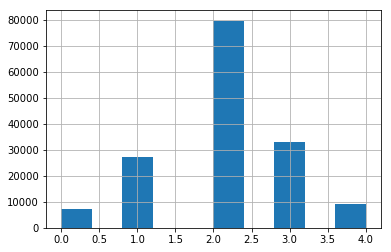

In [7]:
data['Sentiment'].hist()

In [8]:
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [9]:
data.isnull().sum(axis=0)

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [10]:
data[data['Sentiment'] == 4].head()

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
66,67,2,"quiet , introspective and entertaining indepen...",4
74,75,2,entertaining,4
77,78,2,is worth seeking,4
117,118,4,A positively thrilling combination of ethnogra...,4


In [11]:
data['Phrase'].map(len).max()

283

Looking into the data, we draw the following conclusions:
1. 0 is the lowest review for a sentence and 4 is the highest.
2. It seems that the phrases with the same Sentence ID are a part of the same Sentence/Review. But, the Sentiment could be different for the different phrases in a Sentence

In [12]:
data.groupby(['SentenceId']).filter(lambda x: x['Sentiment'].nunique() > 1)['SentenceId'].nunique()

8234

In [13]:
data.groupby(['SentenceId']).filter(lambda x: x['Sentiment'].nunique() > 1)['PhraseId'].nunique()

154756

As we see above, there are 8234 Sentence IDs with more than 1 sentiment. <br>
Out of a total of 156,060 rows, 154,756 rows have one sentence/review with more than 1 sentiment. <br><br>

Let's check out the test data and see how that is.

In [14]:
test_data = pd.read_csv('test.tsv', delimiter='\t')

In [15]:
test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


The test data is similar to the train data. The different phrases in the Sentence are listed seperately and a SentenceId ties them together.